# Using Statistical Data Analysis to assist Telecom company Megaline with analyzing consumer behavior

As an analyst for Megaline, my task in this project is to evaluate the data about the customers usage of the phone service. There are two different plans, the Surf plan and the Ultimate plan. I will look at customer behavior concerning phone calls, call minutes, messages, and internet usage. Each of these behaviors correlate to revenue for Megaline. There are included quantities of each of these for each plan, and then there are overage charges. My task is to find out which of these plans drives more revenue for Megaline so that I can offer helpful feedback to aid in business decisions surrounding these two plans. In the end I will check to see if there is any statistically significant difference between the two plans. 

## Initialization

In [1]:
#Here I'm simply importing the tools that I'm going to need for this project
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

## Load data

In [2]:
# Load the data files into different DataFrames
# I'm also checking to see what each df looks like to get a feel for the data I'm working with
# And I'm calling info on them to get more context for how to clean up the data.
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

display(df_calls.head())
df_calls.info()
display(df_internet.head())
df_internet.info()
display(df_messages.head())
df_messages.info()
display(df_plans.head())
df_plans.info()
display(df_users.head())
df_users.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


I see all the DataFrames are full with no missing data except for the users DataFrame. The churn_date column has a lot of NaN data. This simply means that those users were still using the service at the time the data was collected.

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Print a sample of data for plans
display(df_plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In this DataFrame there are two Rows that each contain the plan information for the two plans that I will be evaluating, Surf and Ultimate. The Ultimate plan has more included messages, data, and minutes. It is $50 more expensive than the surf plan.

There are two issues that I found with this data. First, the internet usage columns are using different units, so I will need to convert the mb column to gb by dividing by 1024. Second, the column called 'plan_name' needs to be renamed as 'plan' so that it will be more cooperative with other DataFrames.

## Fix data

In [5]:
#checking for null values
print(df_plans.isnull().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64


In [6]:
#checking to make sure the datatypes make sense for the information contained in them
print(df_plans.dtypes)

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


In [7]:
#ensuring that there are no duplicated rows
print(df_plans.duplicated().sum())

0


## Enrich data

In [8]:
#I'm renaming the mb column and the plan columns to make them work for future analysis
df_plans.rename(columns={'mb_per_month_included':'gb_per_month_included', 'plan_name': 'plan'}, inplace=True)
df_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [9]:
#for later work I will need the internet usage to both be in gb
df_plans['gb_per_month_included'].replace({15360: 15, 30720: 30}, inplace=True)
df_plans

C:\Users\markl\AppData\Local\Temp\ipykernel_15564\3624316244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_plans['gb_per_month_included'].replace({15360: 15, 30720: 30}, inplace=True)


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Now this df is ready to be used for later analysis

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Print a sample of data for users
display(df_users.sample(10))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
102,1102,Marquitta,Walton,30,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-20,ultimate,NaN
300,1300,Rene,Frost,23,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-21,surf,2018-12-19
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaN
444,1444,Glinda,Dickerson,70,"New Haven-Milford, CT MSA",2018-06-20,surf,NaN
445,1445,Elodia,Donovan,71,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-27,ultimate,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN
447,1447,Ramon,Hester,62,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-01,surf,NaN


There are only null values in the churn_date column. That column will only have a value if the user is no longer using the service at the time the data was collected. Since there are so few non-null values, this suggests that most most of the people involved in this study are still using the service. In a future assignment, I would like to find information on those that stopped using the service to see if I can find any trends there. 



### Fix Data

In [12]:
#checking for null values
print(df_users.isnull().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [13]:
#checking for duplicated rows
print(df_users.duplicated().sum())

0


There are no fully duplicated rows, and the only null values are in the column where they should be. So, this DataFrame appears to be ready to use.

### Enrich Data

In [14]:
#I'm making a dataframe that just has user id and plan as columns for use later in this project
user_plan = pd.DataFrame().assign(user_id=df_users['user_id'], plan=df_users['plan'])
user_plan.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
display(df_calls.sample(10))


,id,user_id,call_date,duration
62780,1226_179,1226,2018-11-29,0.00
39088,1145_335,1145,2018-10-25,10.65
6510,1031_135,1031,2018-12-03,2.43
24258,1091_26,1091,2018-10-24,7.94
28576,1109_203,1109,2018-06-02,1.27
86715,1320_384,1320,2018-06-19,5.71
29040,1110_91,1110,2018-11-30,4.60
61901,1223_52,1223,2018-09-08,7.36
60465,1218_34,1218,2018-12-25,14.31
9074,1041_509,1041,2018-09-24,8.71


There do not appear to be any missing values in this data set. The date column is structured as Y-M-D. The Datatypes make sense for the type of information that they contain.

### Fix data

In [17]:
#check for null values
print(df_calls.isnull().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [18]:
#check for duplicates
print(df_calls.duplicated().sum())

0


There are no missing values and there are no duplicated rows. It appears that this data is ready to be used.

### Enrich data

In [19]:
#Since each call is counted as rounded up, I will round up the 'duration' column
import math
df_calls['duration'] = df_calls['duration'].apply(lambda x: math.ceil(x))
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


In [20]:
#I want to get a feel for phone call length range that I'll be working with
print('The shortest phone call in this data set was', df_calls['duration'].min(), 'minutes. And the longest call was', df_calls['duration'].max(), 'minutes.')

The shortest phone call in this data set was 0 minutes. And the longest call was 38 minutes.


In [21]:
avg_call_length = df_calls['duration'].mean()
print(f'The average call length was {avg_call_length:.2f} minutes.')

The average call length was 7.15 minutes.


In [22]:
#For later analysis I need to get the month isolated from the call date column, so I'm going to create a new column with the month
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month
display(df_calls.head())

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


## Messages

In [23]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
# Print a sample of data for messages
display(df_messages.sample(10))


,id,user_id,message_date
8787,1065_58,1065,2018-11-11
51809,1335_400,1335,2018-12-27
53571,1340_97,1340,2018-09-22
37691,1249_223,1249,2018-08-20
58727,1373_145,1373,2018-11-27
12985,1086_15,1086,2018-12-30
58172,1366_48,1366,2018-09-13
62872,1398_58,1398,2018-10-28
7138,1059_8,1059,2018-05-16
45809,1313_5,1313,2018-10-01


In this data set there doesn't appear to be any obvious issues. The date is structured as Y-M-D just like the other sets. It appears that there are 76051 rows to work with. I wil check for duplicates and missing values.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [25]:
#checking for null values
print(df_messages.isnull().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [26]:
#checking for duplicated rows
print(df_messages.duplicated().sum())

0


There are no missing values or duplicated rows. This data is clean and ready to be used.

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [27]:
#I need to make a month column for later analysis. I will use the same method as I did above
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
display(df_messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [28]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# Print a sample of data for the internet traffic
display(df_internet.sample(10))


,id,user_id,session_date,mb_used
26053,1122_8,1122,2018-06-09,751.71
8858,1046_143,1046,2018-08-10,421.62
49793,1222_292,1222,2018-09-18,329.77
56820,1257_87,1257,2018-09-27,0.00
28715,1132_97,1132,2018-10-08,65.40
99267,1467_404,1467,2018-08-10,576.62
100255,1475_48,1475,2018-12-22,628.66
52977,1239_86,1239,2018-10-31,0.00
36111,1163_92,1163,2018-10-22,112.01
102992,1493_110,1493,2018-12-28,219.97


There are nearly 105k rows in this DataFrame. There appear to be no missing values, and the information in each row appears to fit the datatype.

### Fix data

In [30]:
#checking for null values
print(df_internet.isnull().sum())

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [31]:
#checking for duplicated rows
print(df_internet.duplicated().sum())

0


There are no null values and there are no duplicated rows. This Data is ready for analysis

### Enrich data

In [32]:
#again, I'm adding a month column to be used later in analysis
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
display(df_internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Study plan conditions

In [33]:
# Print out the plan conditions and make sure they are clear for you
display(df_plans)


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [34]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = df_calls.groupby(['user_id', 'month']).agg(total_calls=(
'id','count')).reset_index()
display(calls_per_month.head())


,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [35]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = df_calls.groupby(['user_id','month'])['duration'].agg(total_minutes='sum').reset_index()
display(minutes_per_month.head())

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [36]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = df_messages.groupby(['user_id', 'month']).agg(total_messages=('id','count')).reset_index()
display(messages_per_month.head())



,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [37]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# In this DataFrame I made sure to convert the mb to gb by dividing them by 1024. Then, I rounded them up to the nearest integer
# because that was what the project description said for how they handled the internet usage.
internet_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].agg(total_gb_used='sum').reset_index()
gbs_used = internet_per_month[['total_gb_used']].div(1024, axis=0)
internet_per_month['total_gb_used'] = gbs_used
internet_per_month['total_gb_used'] = internet_per_month['total_gb_used'].apply(lambda x: math.ceil(x))
display(internet_per_month.head())

,user_id,month,total_gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


In [38]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
#calls = calls_per_month.merge(df_users, on='user_id', how='left')
#minutes = minutes_per_month.merge(df_users, on='user_id', how='left')
#internet = internet_per_month.merge(df_users, on='user_id', how='left')
#messages = messages_per_month.merge(df_users, on='user_id', how='left')
merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'],how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = pd.merge(merged_data, internet_per_month, on=['user_id', 'month'], how='outer')
#merged_data.info() This revealed that I have NaN values in Total Messages. I'm going to fill those in with 0
merged_data['total_messages'] = merged_data['total_messages'].fillna(0)

display(merged_data.head())

,user_id,month,total_calls,total_minutes,total_messages,total_gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0


Okay, so now I've merged on by using 'outer' instead of 'left'. I chose this because I reviewed the EDA lesson on merging, and it said that using outer will keep all values of both DataFrames and put NaN in place of empty values. By changing this I had to add a couple lines of code to the Statistical analysis at the end to remove null values that were keeping the t-test from functioning. I'm thinking this is what you were asking for, but if it's not, please let me know and I'll keep working on finding a solution that does make sense. 

In [39]:
# Add the plan information
# I used the user_plan dataframe that I created earlier in order to just bring in the plan each user has.
merged_data=pd.merge(merged_data, user_plan, on='user_id',how='outer')
merged_data=pd.merge(merged_data, df_plans, on='plan', how='outer')

display(merged_data.sample(10))
display(df_plans)

,user_id,month,total_calls,total_minutes,total_messages,total_gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
1349,1406,11.0,70.0,449.0,0.0,23.0,surf,50,15,500,20,10,0.03,0.03
1049,1324,4.0,129.0,1043.0,120.0,14.0,surf,50,15,500,20,10,0.03,0.03
2096,1384,11.0,35.0,200.0,73.0,19.0,ultimate,1000,30,3000,70,7,0.01,0.01
171,1064,11.0,75.0,528.0,21.0,15.0,surf,50,15,500,20,10,0.03,0.03
2268,1475,9.0,44.0,289.0,72.0,17.0,ultimate,1000,30,3000,70,7,0.01,0.01
414,1125,12.0,65.0,517.0,54.0,23.0,surf,50,15,500,20,10,0.03,0.03
865,1263,9.0,72.0,555.0,4.0,21.0,surf,50,15,500,20,10,0.03,0.03
105,1045,12.0,86.0,623.0,47.0,17.0,surf,50,15,500,20,10,0.03,0.03
332,1103,10.0,50.0,373.0,35.0,19.0,surf,50,15,500,20,10,0.03,0.03
1137,1341,11.0,91.0,690.0,75.0,23.0,surf,50,15,500,20,10,0.03,0.03


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


For each plan, to calculate the total revenue I will need to find out how many extra minutes, extra messages, and extra gb were used. 

In [40]:
# First I need to find out how much extra usage each user has each month
merged_data['extra_minutes'] = np.maximum(0, merged_data['total_minutes'] - merged_data['minutes_included'])
merged_data['extra_messages'] = np.maximum(0, merged_data['total_messages'] - merged_data['messages_included'])
merged_data['extra_gbs'] = np.maximum(0, merged_data['total_gb_used'] - merged_data['gb_per_month_included'])

# Second, I will need to calculate the extra charge for each type of overage for each plan
merged_data['extra_charge_minutes'] = merged_data['extra_minutes'] * merged_data['usd_per_minute']
merged_data['extra_charge_messages'] = merged_data['extra_messages'] * merged_data['usd_per_message']
merged_data['extra_charge_gbs'] = merged_data['extra_gbs']*merged_data['usd_per_gb']

# Finally I can add all the extra charges into a total revenue column
merged_data['total_revenue'] = merged_data['usd_monthly_pay'] + merged_data['extra_charge_minutes'] + merged_data['extra_charge_messages']+merged_data['extra_charge_gbs']

display(merged_data.sample(10))


,user_id,month,total_calls,total_minutes,total_messages,total_gb_used,plan,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_gbs,extra_charge_minutes,extra_charge_messages,extra_charge_gbs,total_revenue
1283,1387,8.0,47.0,383.0,15.0,15.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
1930,1236,7.0,78.0,535.0,20.0,14.0,ultimate,1000,30,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
1474,1466,8.0,31.0,171.0,46.0,14.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
563,1171,5.0,37.0,251.0,0.0,21.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,6.0,0.0,0.00,60.0,80.00
1646,1041,9.0,46.0,298.0,0.0,22.0,ultimate,1000,30,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
2138,1405,8.0,22.0,119.0,68.0,23.0,ultimate,1000,30,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
841,1259,8.0,24.0,199.0,36.0,3.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
1660,1050,5.0,62.0,418.0,0.0,17.0,ultimate,1000,30,3000,...,7,0.01,0.01,0.0,0.0,0.0,0.0,0.00,0.0,70.00
378,1117,7.0,57.0,446.0,0.0,18.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,3.0,0.0,0.00,30.0,50.00
1394,1421,12.0,60.0,413.0,87.0,19.0,surf,50,15,500,...,10,0.03,0.03,0.0,37.0,4.0,0.0,1.11,40.0,61.11


## Study user behaviour

### Calls

In [41]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# First I'm going to merge the minutes per month and users dataframs. Then I will separate the two plans into their own dataframes
# I'm also going to create a new column that calculates the average call time
calls_users = pd.merge(minutes_per_month, calls_per_month, on=['user_id'],how='outer')
calls_users['average_call_time'] = calls_users['total_minutes']/calls_users['total_calls']
calls_users = pd.merge(calls_users, df_users, on=['user_id'], how='outer')

#getting just the Surf data
surf_call_group = calls_users.groupby(calls_users.plan)
surf_calls = surf_call_group.get_group('surf')
#getting just the Ultimate data
ultimate_call_group = calls_users.groupby(calls_users.plan)
ultimate_calls = ultimate_call_group.get_group('ultimate')

#making DataFrames of the average call duration per month
surf_avg_call_duration = surf_calls.groupby(['month_y','plan'])['average_call_time'].mean().reset_index(name='avg_call_duration')
print('Surf Average Monthly Call Duration')
display(surf_avg_call_duration)
print('Ultimate Average Monthly Call Duration')
ultimate_avg_call_duration = ultimate_calls.groupby(['month_y','plan'])['average_call_time'].mean().reset_index(name='avg_call_duration')
display(ultimate_avg_call_duration)


Surf Average Monthly Call Duration


,month_y,plan,avg_call_duration
0,1.0,surf,16.278439
1,2.0,surf,18.051595
2,3.0,surf,16.843188
3,4.0,surf,15.573784
4,5.0,surf,13.646956
5,6.0,surf,11.570810
6,7.0,surf,9.977540
7,8.0,surf,10.523561
8,9.0,surf,8.511093
9,10.0,surf,9.532442


Ultimate Average Monthly Call Duration


,month_y,plan,avg_call_duration
0,1.0,ultimate,32.752532
1,2.0,ultimate,9.183100
2,3.0,ultimate,16.079494
3,4.0,ultimate,11.517677
4,5.0,ultimate,10.280760
5,6.0,ultimate,9.047193
6,7.0,ultimate,10.824032
7,8.0,ultimate,8.897471
8,9.0,ultimate,7.858150
9,10.0,ultimate,7.418711


<Axes: title={'center': 'Ultimate Users Average Call Duration Per Month'}, xlabel='Month', ylabel='Avg Duration'>

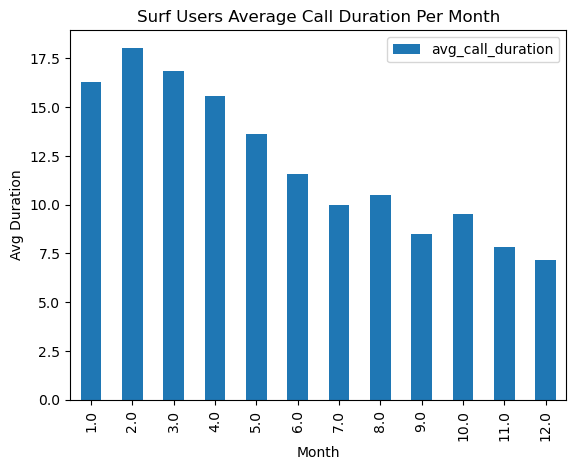

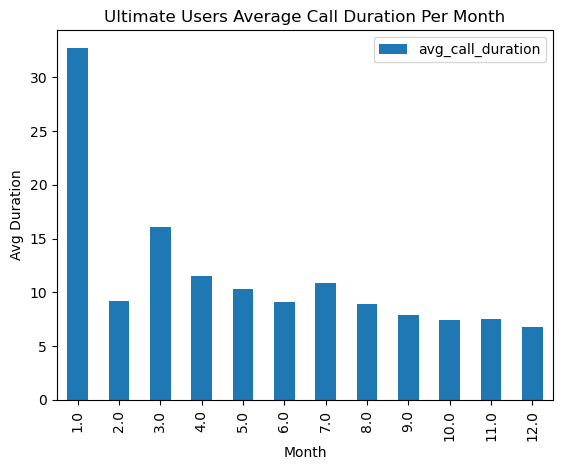

In [42]:
#I'll start with making separate charts to show them individually
surf_avg_call_duration.plot(x='month_y', kind='bar', title='Surf Users Average Call Duration Per Month', xlabel = 'Month', ylabel='Avg Duration')

ultimate_avg_call_duration.plot(x='month_y', kind='bar',title='Ultimate Users Average Call Duration Per Month', xlabel='Month',ylabel='Avg Duration')

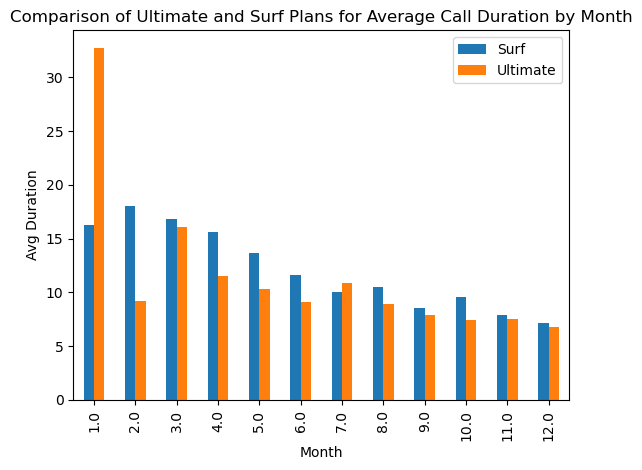

In [43]:
#Now I will make a bar chart that compares the two groups
avg_calls = pd.merge(surf_avg_call_duration, ultimate_avg_call_duration, on='month_y',how='left')
avg_calls.plot(x='month_y', kind='bar', title='Comparison of Ultimate and Surf Plans for Average Call Duration by Month', xlabel='Month', ylabel='Avg Duration')
plt.legend(['Surf','Ultimate'])
plt.show()

In [44]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_group = merged_data.groupby(merged_data.plan)
surf = surf_group.get_group('surf')
ultimate_group = merged_data.groupby(merged_data.plan)
ultimate = ultimate_group.get_group('ultimate')
#display(surf.head())
#display(ultimate.head())
surf_minutes_needed = surf.groupby(['month','plan'])['total_minutes'].mean().reset_index(name='average_minutes')
ultimate_minutes_needed = ultimate.groupby(['month','plan'])['total_minutes'].mean().reset_index(name='average_minutes')
minutes_needed = pd.merge(surf_minutes_needed, ultimate_minutes_needed, on='month', how='left')
display(minutes_needed)

,month,plan_x,average_minutes_x,plan_y,average_minutes_y
0,1.0,surf,203.000000,ultimate,193.500000
1,2.0,surf,297.000000,ultimate,470.333333
2,3.0,surf,330.000000,ultimate,304.250000
3,4.0,surf,351.540000,ultimate,336.857143
4,5.0,surf,410.240000,ultimate,406.241379
5,6.0,surf,435.791667,ultimate,387.444444
6,7.0,surf,453.733333,ultimate,427.067797
7,8.0,surf,417.849057,ultimate,421.436620
8,9.0,surf,420.732984,ultimate,437.511628
9,10.0,surf,438.991379,ultimate,455.028571


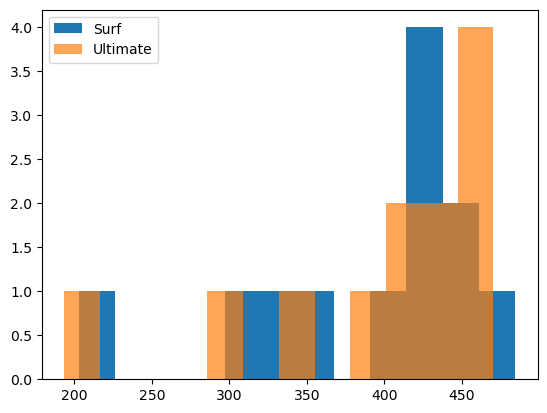

In [45]:
#This is the histogram I've made, I'm not sure if it really gets at the heart of the analysis
plt.hist(minutes_needed['average_minutes_x'], bins=12)
plt.hist(minutes_needed['average_minutes_y'], bins=12, alpha=.7)
plt.legend(['Surf','Ultimate'])
plt.show()

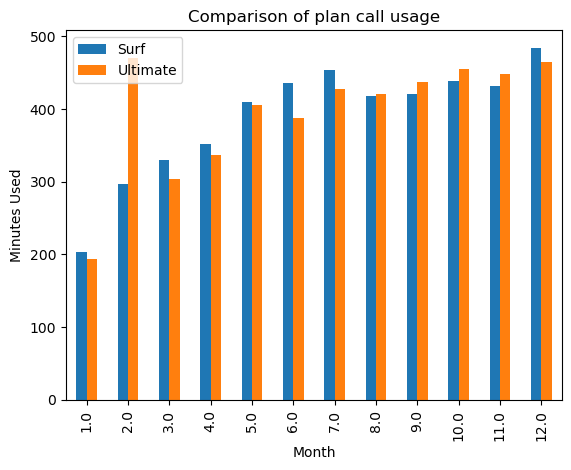

In [46]:
# I wanted to see this as a bar graph because I thought that it would show the comparison a little more cleanly.
minutes_needed.plot(x='month', kind='bar', xlabel='Month', ylabel='Minutes Used', title='Comparison of plan call usage')
plt.legend(['Surf','Ultimate'])
plt.show()



In [47]:
# Calculate the mean and the variance of the monthly call duration
#display(surf_avg_call_duration, ultimate_avg_call_duration)
surf_avg = surf_avg_call_duration['avg_call_duration'].mean()
ultimate_avg = ultimate_avg_call_duration['avg_call_duration'].mean()
surf_var = np.var(surf_avg_call_duration['avg_call_duration'])
ultimate_var = np.var(ultimate_avg_call_duration['avg_call_duration'])
print(f'The average monthly call duration for the Surf plan is: {surf_avg:.2f} minutes')
print(f'The average monthly call duration for the Ultimate plan is: {ultimate_avg:.2f} minutes')
print(f'The Surf plan variance on call duration is: {surf_var:.2f}')
print(f'The Ultimate plan variance on call duration is: {ultimate_var:.2f}')

The average monthly call duration for the Surf plan is: 12.13 minutes
The average monthly call duration for the Ultimate plan is: 11.51 minutes
The Surf plan variance on call duration is: 13.26
The Ultimate plan variance on call duration is: 46.75


In [48]:
display(calls_users.head())

,user_id,month_x,total_minutes,month_y,total_calls,average_call_time,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,124.0,12.0,16.0,7.750000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,182.0,8.0,27.0,6.740741,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,8.0,182.0,9.0,49.0,3.714286,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,8.0,182.0,10.0,65.0,2.800000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,8.0,182.0,11.0,64.0,2.843750,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


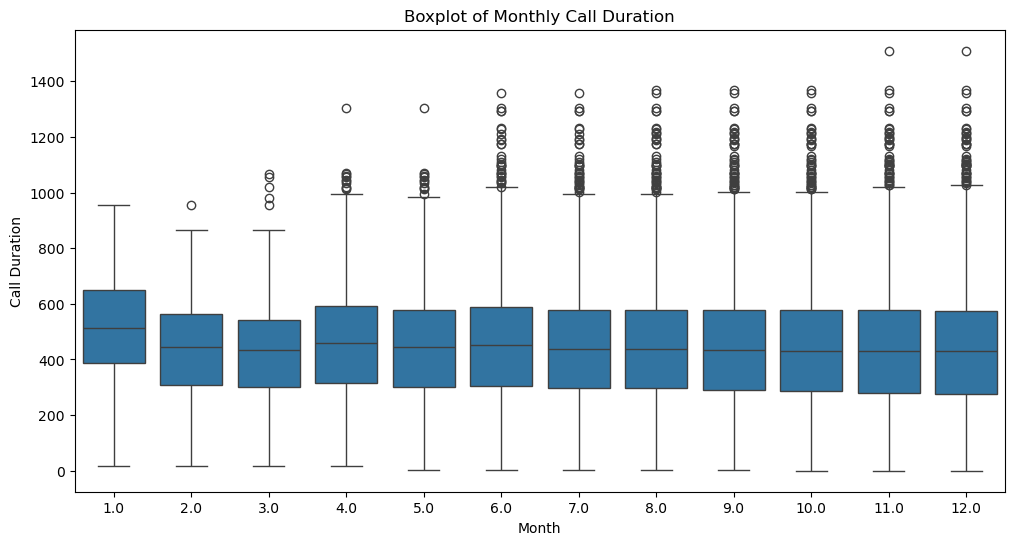

In [49]:
# Plot a boxplot to visualize the distribution of the monthly call duration
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.boxplot(x='month_y', y='total_minutes', data=calls_users)

plt.title('Boxplot of Monthly Call Duration')
plt.xlabel('Month')
plt.ylabel('Call Duration')
plt.show()

 After looking at this data, it does not appear that either plan has significantly different behavior with regard to minutes and phone calls. There were only a few months were I was able to find any substantial difference between the two plans.

### Messages

In [50]:
# Compare the number of messages users of each plan tend to send each month
messages = messages_per_month.merge(df_users, on='user_id', how='left')
#display(messages.head())
surf_messages = surf.groupby(['month','plan'])['total_messages'].mean().reset_index(name='average_messages')
ultimate_messages = ultimate.groupby(['month','plan'])['total_messages'].mean().reset_index(name='average_messages')
#display(surf_messages)
#display(ultimate_messages)
messages_compared = pd.merge(surf_messages, ultimate_messages, on='month', how='left')
display(messages_compared)

,month,plan_x,average_messages_x,plan_y,average_messages_y
0,1.0,surf,10.500000,ultimate,15.500000
1,2.0,surf,12.000000,ultimate,21.571429
2,3.0,surf,15.260870,ultimate,20.250000
3,4.0,surf,17.400000,ultimate,22.047619
4,5.0,surf,24.012987,ultimate,32.103448
5,6.0,surf,25.298969,ultimate,29.340426
6,7.0,surf,27.033058,ultimate,32.830508
7,8.0,surf,28.777778,ultimate,38.478873
8,9.0,surf,30.762887,ultimate,37.895349
9,10.0,surf,33.839662,ultimate,39.443396


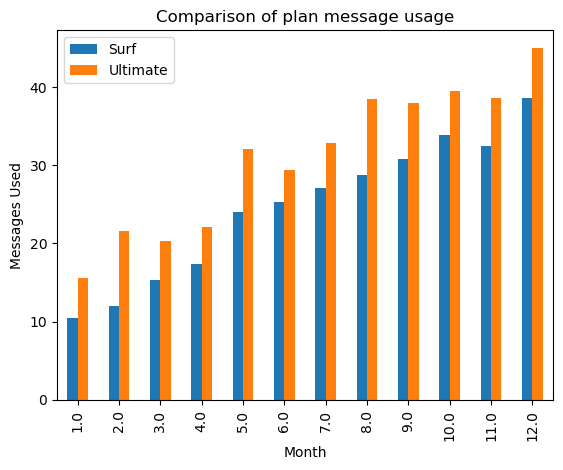

In [51]:
#I'm making a barplot to compare the two plans and their monthly messaging
messages_compared.plot(x='month', kind='bar', xlabel='Month', ylabel='Messages Used', title='Comparison of plan message usage')
plt.legend(['Surf','Ultimate'])
plt.show()


After analyzing this data, it appears that the users who subscribed to the Ultimate Plan did use more messages each month than those who subscribed to the Surf Plan.

### Internet

In [52]:
# Compare the amount of internet traffic consumed by users per plan
internet_traffic_per_plan = merged_data.groupby('plan')['total_gb_used'].sum().reset_index()
display(internet_traffic_per_plan)
surf_int = surf.groupby(['month','plan'])['total_gb_used'].mean().reset_index(name='average_gb')
ultimate_int = ultimate.groupby(['month','plan'])['total_gb_used'].mean().reset_index(name='average_gb')
#display(surf_int)
#display(ultimate_int)
internet_compared = pd.merge(surf_int, ultimate_int, on='month', how='left')
display(internet_compared)

,plan,total_gb_used
0,surf,26223.0
1,ultimate,12461.0


,month,plan_x,average_gb_x,plan_y,average_gb_y
0,1.0,surf,5.000000,ultimate,7.250000
1,2.0,surf,12.222222,ultimate,17.285714
2,3.0,surf,13.565217,ultimate,18.416667
3,4.0,surf,12.469388,ultimate,16.333333
4,5.0,surf,14.302632,ultimate,16.862069
5,6.0,surf,15.810526,ultimate,15.425532
6,7.0,surf,17.016667,ultimate,16.491525
7,8.0,surf,17.201258,ultimate,17.845070
8,9.0,surf,16.777202,ultimate,17.011628
9,10.0,surf,17.632479,ultimate,17.885714


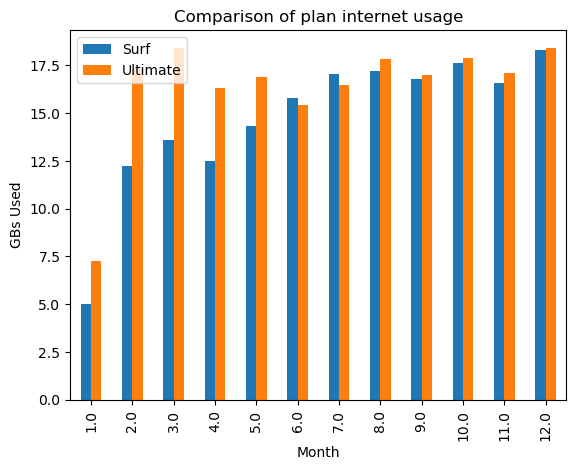

In [53]:
internet_compared.plot(x='month', kind='bar', xlabel='Month', ylabel='GBs Used', title='Comparison of plan internet usage')
plt.legend(['Surf','Ultimate'])
plt.show()

There does not appear to be as much variation between the two plans and the amount of internet usage during the second half of the year. In the first half of the year the Ultimate users did use quite a bit more internet. Interestingly the Surf plan accounts for twice the amount of internet usage as the Ultimate users. This would suggest that the majority of users are on the Surf plan.

## Revenue

In [54]:
display(merged_data.head())


,user_id,month,total_calls,total_minutes,total_messages,total_gb_used,plan,messages_included,gb_per_month_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,extra_minutes,extra_messages,extra_gbs,extra_charge_minutes,extra_charge_messages,extra_charge_gbs,total_revenue
0,1001,8.0,27.0,182.0,30.0,7.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
1,1001,9.0,49.0,315.0,44.0,14.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,0.0,0.0,0.00,0.0,20.00
2,1001,10.0,65.0,393.0,53.0,22.0,surf,50,15,500,...,10,0.03,0.03,0.0,3.0,7.0,0.0,0.09,70.0,90.09
3,1001,11.0,64.0,426.0,36.0,19.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,4.0,0.0,0.00,40.0,60.00
4,1001,12.0,56.0,412.0,44.0,19.0,surf,50,15,500,...,10,0.03,0.03,0.0,0.0,4.0,0.0,0.00,40.0,60.00


In [55]:
#I'm looking to get a broad summary of how much money each plan has brought in for Megaline.
total_revenue_per_plan = merged_data.groupby('plan')['total_revenue'].sum().reset_index()
display(total_revenue_per_plan)

,plan,total_revenue
0,surf,92562.09
1,ultimate,51534.00


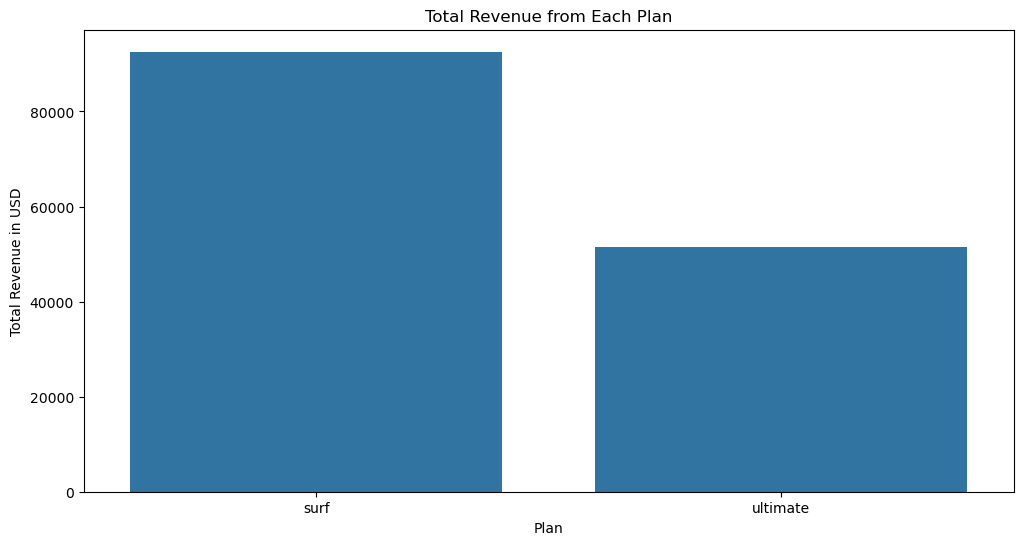

In [56]:
#Here is a barplot to show how much more money the Surf plan brings in
plt.figure(figsize=(12,6))
sns.barplot(x='plan',y='total_revenue', data=total_revenue_per_plan)
plt.title('Total Revenue from Each Plan')
plt.xlabel('Plan')
plt.ylabel('Total Revenue in USD')
plt.show()

In [57]:
#I'm also interested in seeing how much revenue each plan brings in on average per user
average_revenue_per_user = merged_data.groupby('plan')['total_revenue'].mean().reset_index()
display(average_revenue_per_user)

,plan,total_revenue
0,surf,60.498098
1,ultimate,72.277700


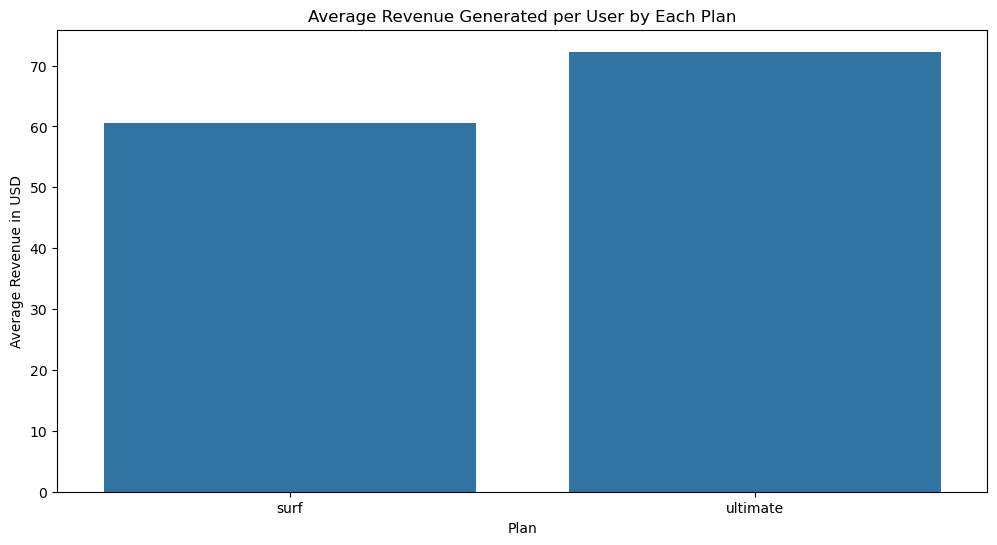

In [58]:
#This barplot will show the above DataFrame visually. 
plt.figure(figsize=(12,6))
sns.barplot(x='plan', y='total_revenue', data=average_revenue_per_user)
plt.title('Average Revenue Generated per User by Each Plan')
plt.xlabel('Plan')
plt.ylabel('Average Revenue in USD')
plt.show()

In [59]:
#I'm curious to see what the revenue per month data will look like on each plan
surf_revenue_month = surf.groupby(['month','plan'])['total_revenue'].mean().reset_index(name='revenue')
ultimate_revenue_month = ultimate.groupby(['month','plan'])['total_revenue'].mean().reset_index(name='revenue')
monthly_revenue_per_plan = pd.merge(surf_revenue_month, ultimate_revenue_month, on='month', how='left')
display(monthly_revenue_per_plan)

,month,plan_x,revenue_x,plan_y,revenue_y
0,1.0,surf,20.000000,ultimate,70.000000
1,2.0,surf,34.396667,ultimate,70.000000
2,3.0,surf,45.941304,ultimate,74.666667
3,4.0,surf,41.133265,ultimate,73.000000
4,5.0,surf,48.747838,ultimate,70.724138
5,6.0,surf,50.163404,ultimate,71.711111
6,7.0,surf,63.192689,ultimate,71.898305
7,8.0,surf,65.203333,ultimate,72.859155
8,9.0,surf,57.321421,ultimate,72.034884
9,10.0,surf,65.368690,ultimate,72.333333


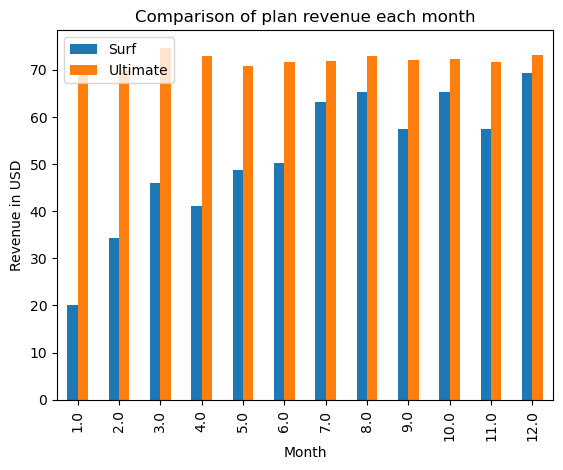

In [60]:
monthly_revenue_per_plan.plot(x='month', kind='bar', xlabel='Month', ylabel='Revenue in USD', title='Comparison of plan revenue each month')
plt.legend(['Surf','Ultimate'])
plt.show()

In these barplots we're able to see that the ultimate plan is driving more revenue than the Surf plan. Howerver, it appears that the revenue from the Surf plan is growing quite a bit month over month, so it would be interesting to see if the next year's data looks different than this one.

## Test statistical hypotheses

In [61]:
# Test the hypotheses
#Null Hypothesis: There is no difference in revenue betewen the Ultimate and Surf Plans
#Alternative hypothesis: There is a significant difference in revenue generated from the Ultimate plan
# I will use a 2 sample t-test and set the alpha to .05
from scipy import stats as st
revenue_ultimate = merged_data[merged_data['plan'] == 'ultimate']['total_revenue']
revenue_surf= merged_data[merged_data['plan'] == 'surf']['total_revenue']
#I'm getting a nan result for the t-test, so I'm checking for null values, then I will drop those from the data set
#print(revenue_surf.isnull().sum())
revenue_surf.dropna(inplace=True)
revenue_ultimate.dropna(inplace=True)
results = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

print('p-value: ', results.pvalue)

alpha = .05

if results.pvalue < alpha:
    print('Reject the null hypothesis  - There is a signficant difference between the average revenues of the Ultimate and Surf Plans')
else:
    print('Fail the reject the null hypothesis - there is no significant difference between the average revenues of the two plans')

p-value:  4.456749773640831e-16
Reject the null hypothesis  - There is a signficant difference between the average revenues of the Ultimate and Surf Plans


C:\Users\markl\AppData\Local\Temp\ipykernel_15564\1365258920.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_surf.dropna(inplace=True)
C:\Users\markl\AppData\Local\Temp\ipykernel_15564\1365258920.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_ultimate.dropna(inplace=True)


In [62]:
# Test the hypotheses
#Null Hypothesis: The average revenue from users in the NY-NJ area is the same as other regions
#Alternative Hypothesis: The average revenue from users in the NY-NJ area is different from other regions
#I will use a 2 sample t-test
#I will use alpha = .05
#the city column contains this string 'New York-Newark-Jersey City, NY-NJ-PA MSA'
final_merge = pd.merge(merged_data, df_users, on='user_id', how='left')
revenue_ny_nj = final_merge[final_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']
revenue_other = final_merge[final_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_revenue']
revenue_other.dropna(inplace=True)
revenue_ny_nj.dropna(inplace=True)
results = st.ttest_ind(revenue_ny_nj, revenue_other, equal_var=False)

print('p-value: ', results.pvalue)

alpha = .05

if results.pvalue < alpha:
    print('Reject the null hypothesis  - There is a signficant difference between the average revenue of users in the NY-NJ area to those in other regions')
else:
    print('Fail the reject the null hypothesis - there is no significant difference between the average revenue of users in the NY-NJ area to those in other regions')

p-value:  0.008864014540562484
Reject the null hypothesis  - There is a signficant difference between the average revenue of users in the NY-NJ area to those in other regions


C:\Users\markl\AppData\Local\Temp\ipykernel_15564\1418350557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_other.dropna(inplace=True)
C:\Users\markl\AppData\Local\Temp\ipykernel_15564\1418350557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_ny_nj.dropna(inplace=True)


## Conclusion ##

In this project for Megaline, I used the data acquired regarding the two plans that they offer: Ultimate and Surf, and compared their customers' behavior based on which plan they selected. In order to find out whether one plan or the other is more financially productive I had to take each of the dataframes and adjust some of the columns to find key information about monthly usages. I also had to merge the data into a single dataframe so that I could then explore and compare the data from each plan.

Key Findings: Although the Surf plan is less exspenive and it has produced less revenue in 2018, it produced an increasing revenue pattern month over month, so it would be helpful to re-evalute in 2019 if it has overtaken the Ultimate plan's revenue.

At the time of this data being compiled it is clear that there is still a statistically signficant difference between the revenues from each plan. 